In [44]:
#multiple linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [45]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [46]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [47]:
df.ndim

2

In [48]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [50]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [51]:
x=df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [52]:
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

Text(0.5, 1.0, 'Tv_sales')

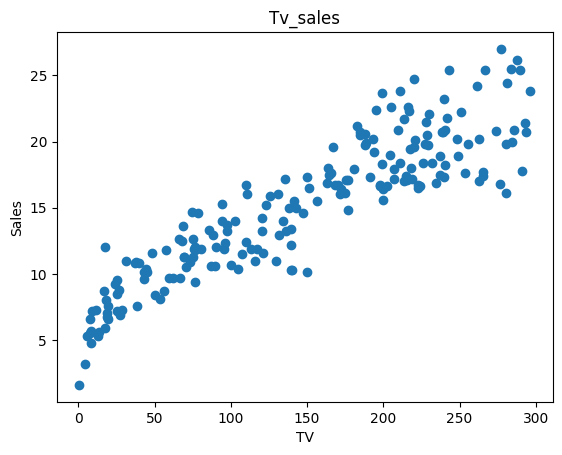

In [53]:
plt.scatter(df['TV'],df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Tv_sales')

Text(0.5, 1.0, 'radio_sales')

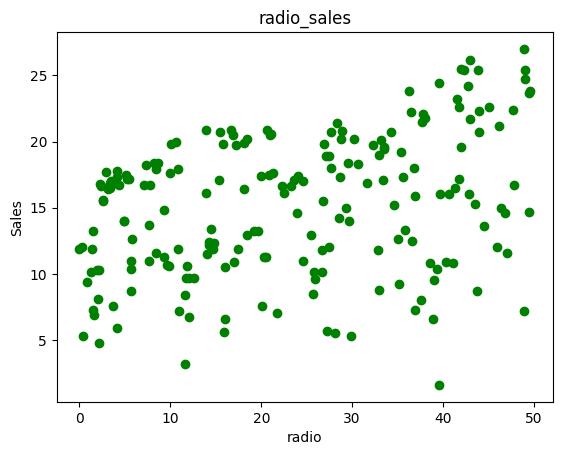

In [54]:
plt.scatter(df['Radio'],df['Sales'],color='g')
plt.xlabel('radio')
plt.ylabel('Sales')
plt.title('radio_sales')

Text(0.5, 1.0, 'newspaper_sales')

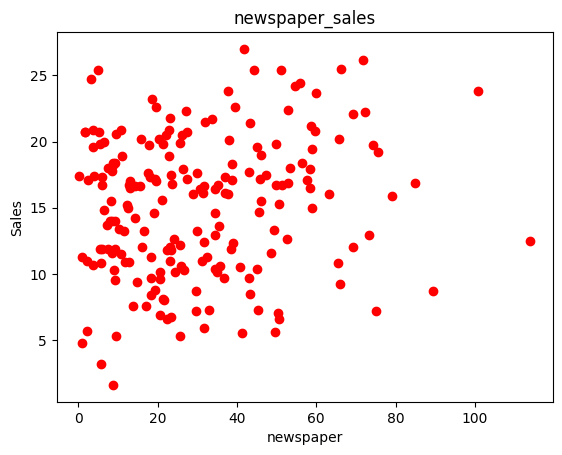

In [55]:
plt.scatter(df['Newspaper'],df['Sales'],color='r')
plt.xlabel('newspaper')
plt.ylabel('Sales')
plt.title('newspaper_sales')

<Axes: xlabel='TV', ylabel='Sales'>

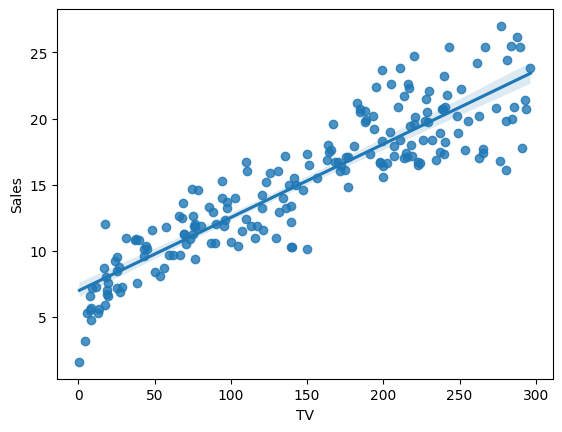

In [56]:
#using seaborn to draw regression plot
import seaborn as sns
sns.regplot(x=df['TV'],y=y)


<Axes: xlabel='Radio', ylabel='Sales'>

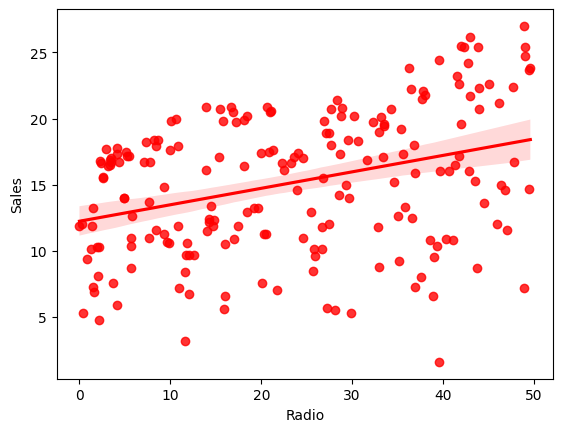

In [57]:
sns.regplot(x=df['Radio'],y=y,color='r')

<Axes: xlabel='Newspaper', ylabel='Sales'>

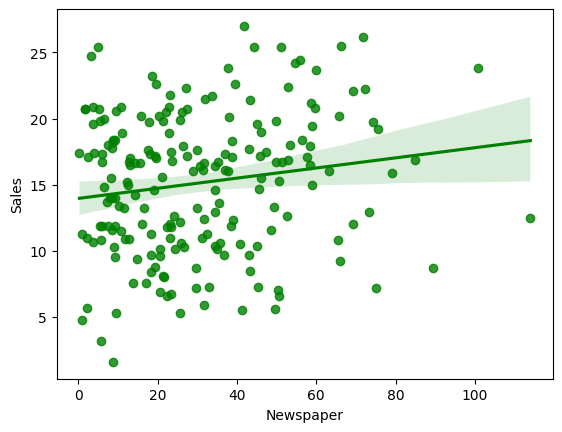

In [58]:
sns.regplot(x=df['Newspaper'],y=y,color='g')

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [60]:
x_test

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [61]:
y_train

169    20.0
97     20.5
31     11.9
12      9.2
35     17.8
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 140, dtype: float64

In [62]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    16.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     16.7
Name: Sales, dtype: float64

In [63]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array([17.15991908, 20.53369503, 23.68914396,  9.5191455 , 21.60736836,
       12.78101318, 21.08636345,  8.76054246, 17.11499951, 16.68789636,
        8.97584663,  8.57645026, 18.33212325,  8.17863567, 12.64605571,
       14.94486946,  8.34939536, 17.83858948, 11.12172174, 20.37740648,
       20.9483297 , 13.04035779, 11.01360656, 22.51142595,  9.40369784,
        7.98591291, 20.86943368, 13.77882255, 10.83407064,  8.00419229,
       15.88597618, 10.7027424 , 20.9521718 , 10.84679243, 21.50720813,
       21.07347295, 12.22673775, 22.85273767, 12.57698182,  6.54597206,
       11.93411853, 15.23490068, 10.07411153,  9.52159696, 17.11786382,
        7.28032677, 10.49404864, 15.24356754, 11.20742176, 11.78392665,
       14.01472163, 14.59884572, 10.82722434,  9.55839415,  9.03749681,
       12.51183313, 10.52551021, 25.01900824,  7.99334943, 15.73916263])

In [64]:
y_pred

array([17.15991908, 20.53369503, 23.68914396,  9.5191455 , 21.60736836,
       12.78101318, 21.08636345,  8.76054246, 17.11499951, 16.68789636,
        8.97584663,  8.57645026, 18.33212325,  8.17863567, 12.64605571,
       14.94486946,  8.34939536, 17.83858948, 11.12172174, 20.37740648,
       20.9483297 , 13.04035779, 11.01360656, 22.51142595,  9.40369784,
        7.98591291, 20.86943368, 13.77882255, 10.83407064,  8.00419229,
       15.88597618, 10.7027424 , 20.9521718 , 10.84679243, 21.50720813,
       21.07347295, 12.22673775, 22.85273767, 12.57698182,  6.54597206,
       11.93411853, 15.23490068, 10.07411153,  9.52159696, 17.11786382,
        7.28032677, 10.49404864, 15.24356754, 11.20742176, 11.78392665,
       14.01472163, 14.59884572, 10.82722434,  9.55839415,  9.03749681,
       12.51183313, 10.52551021, 25.01900824,  7.99334943, 15.73916263])

In [65]:
print(model.predict([[34,10,34]]))

[7.86252659]


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [77]:

print("Slope of TV vs Sales:", model.coef_[0])
print("Slope of Radio vs Sales:", model.coef_[1])
print("Slope of Newspaper vs Sales:", model.coef_[2])

#or
print('slope is',list((zip(x,model.coef_))))



Slope of TV vs Sales: 0.05358869132706914
Slope of Radio vs Sales: 0.10270676778771286
Slope of Newspaper vs Sales: 0.007931667677316342
slope is [('TV', np.float64(0.05358869132706914)), ('Radio', np.float64(0.10270676778771286)), ('Newspaper', np.float64(0.007931667677316342))]


In [67]:
print('constant is',model.intercept_)

constant is 4.743766701589685


In [69]:
df1=pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred,'difference':y_test-y_pred})
df1

,actual_value,predicted_value,difference
95,16.9,17.159919,-0.259919
15,22.4,20.533695,1.866305
30,21.4,23.689144,-2.289144
158,7.3,9.519146,-2.219146
128,24.7,21.607368,3.092632
115,12.6,12.781013,-0.181013
69,22.3,21.086363,1.213637
170,8.4,8.760542,-0.360542
174,16.5,17.115000,-0.615000
45,16.1,16.687896,-0.587896


In [70]:

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
MAE=mean_absolute_error(y_test,y_pred)
MAE

1.1594875061090586

In [71]:
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MAPE

0.1053644082302931

In [72]:
MSE=mean_squared_error(y_test,y_pred)
MSE

2.541624036229149

In [73]:
RMSE=root_mean_squared_error(y_test,y_pred)
RMSE


1.5942471691143594

In [74]:
r2score=r2_score(y_test,y_pred)
r2score

0.9091484341849799